<a href="https://colab.research.google.com/github/JuliaJakimowicz/SystemyUczaceSieAnalizaDanych/blob/main/Lab_2_Projekt_Uczenia_Maszynowego_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projekt uczenia maszynowego: Boston Housing
Zbiór danych:

https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

## 1. Zakres problemu

**Cel:** Stworzyć model regresyjny, który na podstawie cech (np. liczba pokoi, zanieczyszczenie, dostęp do dróg) przewidzi cenę nieruchomości.

**Teoria:**
- **Regresja vs. Klasyfikacja:** Regresja przewiduje wartość ciągłą, a klasyfikacja – kategorię.
- **Zastosowanie:** Modele regresyjne są wykorzystywane np. do wyceny nieruchomości.

**Komentarz:** Ustalenie zakresu problemu jest pierwszym krokiem w budowie modelu.

## 2. Wskaźniki wydajności

**Cel:** Określić metryki, które ocenią jakość modelu:

# Metryki regresyjne

- **MAE** – średni błąd bezwzględny
- **MSE** – średni błąd kwadratowy
- **RMSE** – pierwiastek z MSE
- **R²** – współczynnik determinacji

## Mean Absolute Error (MAE)
MAE mierzy średnią wartość bezwzględnych różnic między rzeczywistymi wartościami \( y_i \) a prognozowanymi \( \hat{y}_i \). Ta metryka jest mniej wrażliwa na duże błędy niż MSE, ponieważ nie podnosi różnic do kwadratu.

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$

---

## Mean Squared Error (MSE)
MSE mierzy średnią wartość kwadratów różnic między rzeczywistymi a prognozowanymi wartościami. Dzięki podnoszeniu błędów do kwadratu metryka ta karze większe odchylenia bardziej niż MAE.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

---

## Root Mean Squared Error (RMSE)
RMSE to pierwiastek kwadratowy z MSE, co pozwala uzyskać wynik w tych samych jednostkach co dane wejściowe. Utrzymuje on właściwości MSE (wrażliwość na duże błędy), ale jest bardziej intuicyjny, ponieważ działa w tej samej skali co oryginalne dane.

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

---

## R² – Współczynnik determinacji
R² mierzy, jaka część wariancji zmiennej docelowej jest wyjaśniona przez model. Wartość \( R^2 \) bliska 1 oznacza, że model dobrze dopasowuje się do danych. Wzór wygląda następująco:

$$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}
$$

---

Więcej szczegółowych informacji znajdziesz w dokumentacji scikit-learn:  

[Dokumentacja: Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

## 3. Założenia – Wycena cen domów

**Cel:** Określić specyficzne założenia modelu w kontekście wyceny nieruchomości oraz wskazać, jakie działania należy podjąć w procesie przygotowania danych.

**Założenia:**
- **Reprezentatywność danych:** Zakładamy, że dane historyczne (np. Boston Housing) odzwierciedlają strukturę rynku nieruchomości, choć mogą nie uwzględniać najnowszych trendów.
- **Kompletność i jakość danych:** Dane są w dużej mierze kompletne, ale należy dokładnie przeanalizować występowanie braków i błędnych obserwacji, które mogą wpłynąć na jakość modelu.
- **Nieliniowe zależności:** Przyjmujemy, że zależności między cechami (np. liczba pokoi, lokalizacja, wiek budynku) a ceną domów mogą być nieliniowe. Dlatego warto eksperymentować nie tylko z modelami liniowymi, ale także z modelami nieliniowymi (np. drzewami decyzyjnymi, metodami ensemble) oraz stosować transformacje cech.

**Teoria i działania:**
- **Feature Engineering:** Rozważenie transformacji istniejących cech oraz tworzenia nowych zmiennych (np. stosunek liczby pokoi do wieku budynku) może pomóc w uchwyceniu nieliniowych zależności.
- **Weryfikacja jakości danych:** Przeprowadzenie dokładnej analizy eksploracyjnej (EDA) w celu identyfikacji braków, outlierów i nieprawidłowych wartości, a następnie zastosowanie odpowiednich metod czyszczenia danych (np. imputacja, usuwanie outlierów).
- **Bias-Variance Trade-off:** Dobór modelu powinien uwzględniać kompromis między uproszczeniem modelu (wysoki bias) a jego zdolnością do generalizacji (niska wariancja).



## 4. Pobieranie danych

**Cel:** Wczytać zbiór Boston Housing.

In [2]:
import pandas as pd

# Wczytanie danych z pliku CSV (przesłanego do Colaba)
data = pd.read_csv('BostonHousing.csv')

# Podgląd pierwszych kilku wierszy danych
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


## 5. Eksploracja i wizualizacja danych

**Cel:** Wykonać analizę eksploracyjną (EDA) – statystyki opisowe, histogramy i wykrywanie outlierów.

- **EDA:** Pozwala zrozumieć strukturę danych i wykryć ewentualne problemy.
- **Wizualizacja:** Ułatwia identyfikację zależności między zmiennymi.

[Dokumentacja: DataFrame.describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)

[Dokumentacja: DataFrame.hist()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html)

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

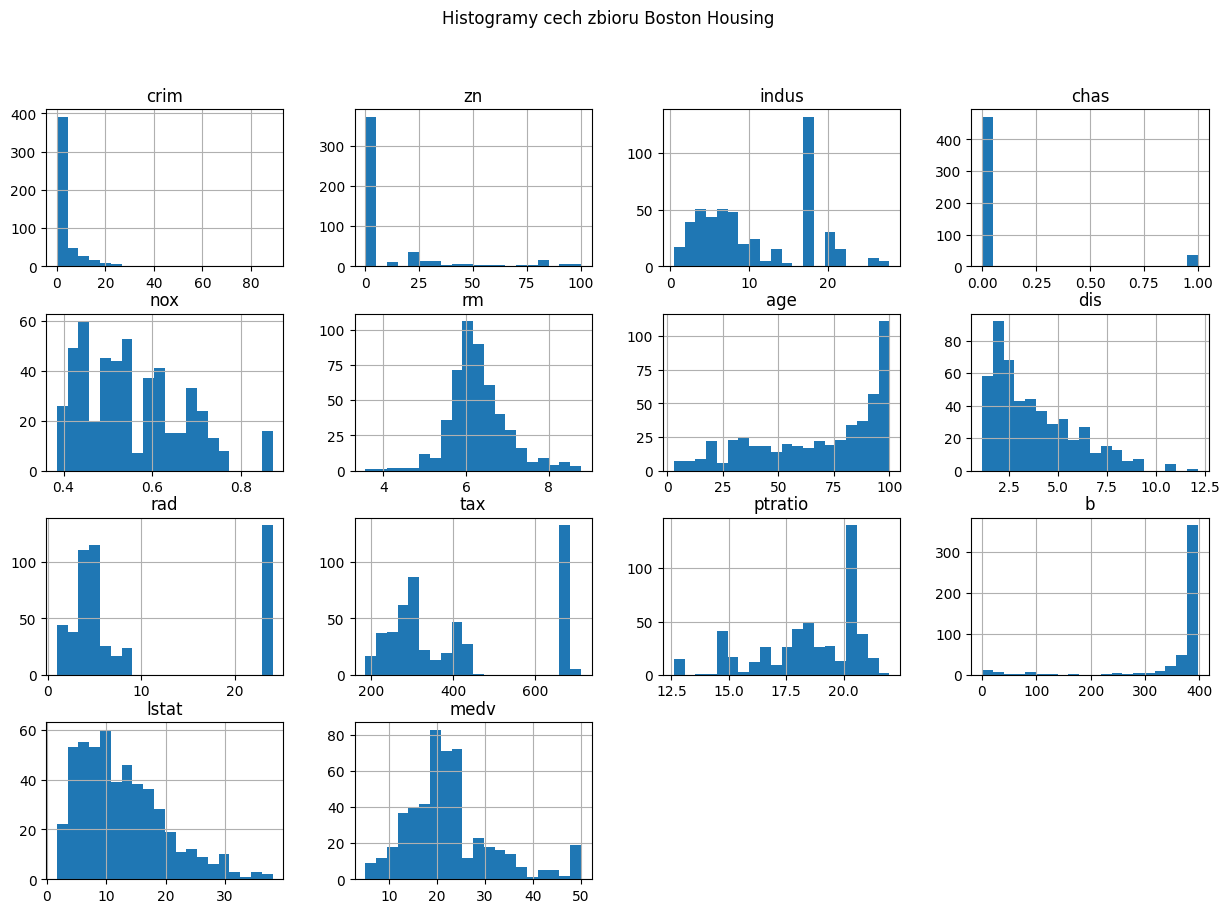

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statystyki opisowe
print(data.describe())

# Histogramy cech
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramy cech zbioru Boston Housing')
plt.show()

## 7. Analiza korelacji

**Cel:** Sprawdzić zależności między cechami i ceną za pomocą macierzy korelacji.

- **Korelacja:** Mierzy siłę i kierunek liniowych zależności.
- **Ograniczenia:** Korelacja Pearsona nie wykrywa nieliniowych zależności.

[Dokumentacja: Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

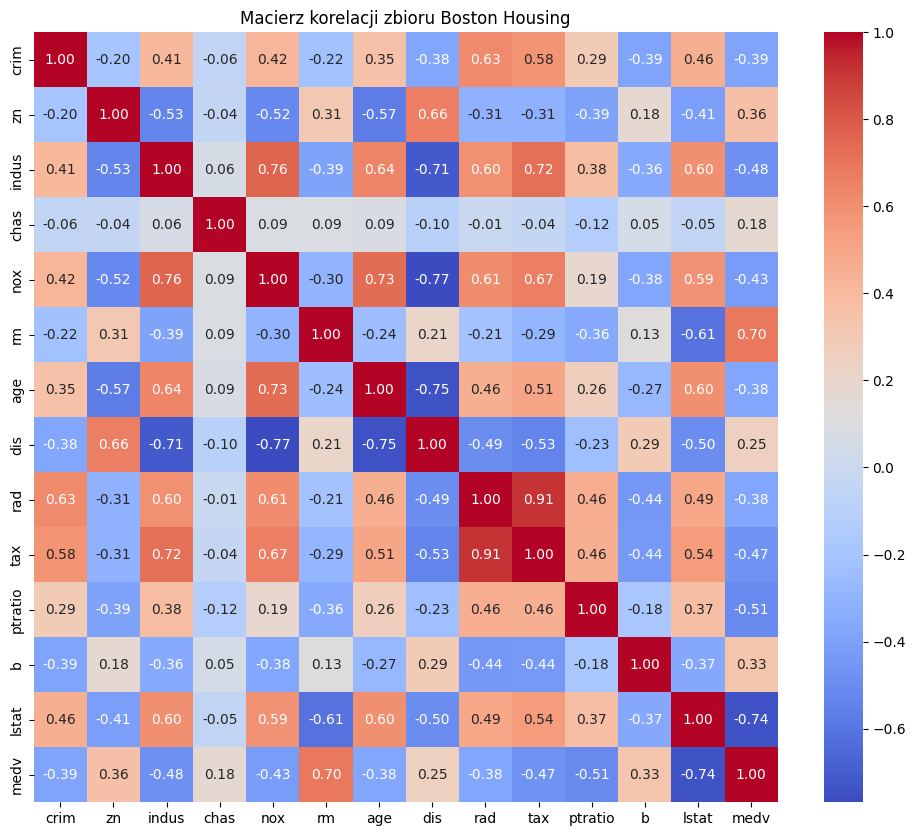

In [4]:
# Obliczenie i wizualizacja macierzy korelacji
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Macierz korelacji zbioru Boston Housing')
plt.show()

## 8. Eksperymenty z cechami

**Cel:** Przetestować usunięcie lub modyfikację cech o niskiej korelacji.


- **Feature Selection:** Redukuje wymiarowość i poprawia wydajność modelu.

**Komentarz:** Eksperymentowanie z cechami wpływa na ostateczną jakość modelu.

In [5]:
# Usunięcie cech o niskiej korelacji z 'PRICE'
low_corr_features = corr_matrix['medv'][abs(corr_matrix['medv']) < 0.2].index.tolist()
print('Cechy o niskiej korelacji:', low_corr_features)

data_reduced = data.drop(columns=low_corr_features)
print(data_reduced.head())

Cechy o niskiej korelacji: ['chas']
      crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


## 9. Przygotowanie danych

**Cel:** Podzielić dane na zbiór treningowy i testowy oraz przygotować je do modelowania.


[Dokumentacja: train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [6]:
from sklearn.model_selection import train_test_split

# Podział danych
X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Kształt zbioru treningowego:', X_train.shape)
print('Kształt zbioru testowego:', X_test.shape)

Kształt zbioru treningowego: (404, 13)
Kształt zbioru testowego: (102, 13)


## 10. Czyszczenie danych

**Cel:** Sprawdzić, czy występują braki danych lub duplikaty i je uzupełnić/usunąć.

- **Czyszczenie danych:** Ważne dla poprawności dalszych analiz.
- **Imputacja:** Metoda zastępowania brakujących wartości (np. średnią).

[Dokumentacja: DataFrame.isnull()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isnull.html)

In [7]:
# Sprawdzenie braków
print(data.isnull().sum())

# Przykładowa imputacja (jeśli potrzebna):
# data.fillna(data.mean(), inplace=True)

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


## 12. Skalowanie cech

**Cel:** Skalowanie cech przed treningiem modeli.

**Teoria:**
- **StandardScaler:** Usuwa średnią i skaluje do wariancji jednostkowej.

[Dokumentacja: StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [8]:
from sklearn.preprocessing import StandardScaler

# Skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Przykładowe dane po skalowaniu:', X_train_scaled[:5])

Przykładowe dane po skalowaniu: [[ 1.28770177 -0.50032012  1.03323679 -0.27808871  0.48925206 -1.42806858
   1.02801516 -0.80217296  1.70689143  1.57843444  0.84534281 -0.07433689
   1.75350503]
 [-0.33638447 -0.50032012 -0.41315956 -0.27808871 -0.15723342 -0.68008655
  -0.43119908  0.32434893 -0.62435988 -0.58464788  1.20474139  0.4301838
  -0.5614742 ]
 [-0.40325332  1.01327135 -0.71521823 -0.27808871 -1.00872286 -0.40206304
  -1.6185989   1.3306972  -0.97404758 -0.60272378 -0.63717631  0.06529747
  -0.65159505]
 [ 0.38822983 -0.50032012  1.03323679 -0.27808871  0.48925206 -0.30045039
   0.59168149 -0.8392398   1.70689143  1.57843444  0.84534281 -3.86819251
   1.52538664]
 [-0.32528234 -0.50032012 -0.41315956 -0.27808871 -0.15723342 -0.83109424
   0.03374663 -0.00549428 -0.62435988 -0.58464788  1.20474139  0.3791194
  -0.16578736]]


## 13. Wybór i trening modelu

**Cel:** Wybrać model (np. regresja liniowa) i przeprowadzić wstępny trening.

- **Regresja liniowa:** Prosty model, który daje interpretację zależności liniowych.
- **Bias-Variance:** Modele proste mają wysoki bias, ale niską wariancję.

[Dokumentacja: LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [10]:
from sklearn.linear_model import LinearRegression

# Trening modelu
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print('Współczynniki regresji:', model.coef_)

Współczynniki regresji: [-1.00213533  0.69626862  0.27806485  0.7187384  -2.0223194   3.14523956
 -0.17604788 -3.0819076   2.25140666 -1.76701378 -2.03775151  1.12956831
 -3.61165842]


## 14. Ocena modelu na zbiorze treningowym

**Cel:** Ocenić model na danych treningowych.

**Teoria:**
- **Overfitting:** Zbyt dobre dopasowanie do danych treningowych może pogorszyć generalizację.

[Dokumentacja: Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train_scaled)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('MSE (trening):', mse_train)
print('R² (trening):', r2_train)

MSE (trening): 21.641412753226316
R² (trening): 0.7508856358979672


## 15. Walidacja krzyżowa

**Cel:** Użyć k-krotnej walidacji dla rzetelnej oceny modelu.

**Teoria:**
- **K-Fold Cross-Validation:** Model trenuje się na k-1 częściach danych, a testuje na pozostałej.

[Dokumentacja: cross_val_score](https://scikit-learn.org/stable/modules/cross_validation.html)

In [12]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = [(-score)**0.5 for score in cv_scores]

print('RMSE (walidacja):', cv_rmse)
print('Średnie RMSE:', sum(cv_rmse)/len(cv_rmse))

RMSE (walidacja): [4.147509706520418, 5.865883322266444, 4.871682447566822, 4.503827934798887, 4.758561915032001]
Średnie RMSE: 4.829493065236915


## 16. Strojenie modelu: Grid Search

**Cel:** Znaleźć najlepsze hiperparametry przy użyciu GridSearchCV.


- **Grid Search:** Systematycznie przeszukuje kombinacje zadanych parametrów.

[Dokumentacja: GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print('Najlepsze hiperparametry (Grid Search):', grid_search.best_params_)


Najlepsze hiperparametry (Grid Search): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## 17. Strojenie modelu: Randomized Search

**Cel:** Losowo przeszukać przestrzeń hiperparametrów, aby szybciej znaleźć dobre ustawienia.


- **Randomized Search:** Wybiera losowe kombinacje, co może przyspieszyć proces strojenia.

[Dokumentacja: RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5,
                                   scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search.fit(X_train_scaled, y_train)

print('Najlepsze hiperparametry (Random Search):', random_search.best_params_)


Najlepsze hiperparametry (Random Search): {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}


## 18. Metody zespołowe

**Cel:** Zastosować metody ensemble (np. RandomForest) dla lepszej stabilności predykcji.

**Teoria:**
- **Ensemble Methods:** Łączą wyniki wielu modeli, co często poprawia dokładność.

[Dokumentacja: RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [15]:
# Użycie najlepszego modelu z Grid Search
best_rf = grid_search.best_estimator_

# Trenowanie modelu ensemble
best_rf.fit(X_train_scaled, y_train)

y_train_pred_rf = best_rf.predict(X_train_scaled)
mse_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_rf = r2_score(y_train, y_train_pred_rf)

print('RandomForest - MSE:', mse_rf)
print('RandomForest - R²:', r2_rf)

RandomForest - MSE: 1.9777355049504939
RandomForest - R²: 0.9772342809457157


## 19. Analiza błędów

**Cel:** Zanalizować reszty (błędy) modelu i wizualizować ich rozkład.

**Teoria:**
- **Analiza reszt:** Pomaga wykryć systematyczne błędy i sprawdzić, czy błędy są losowe.

[Dokumentacja: Matplotlib Pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)

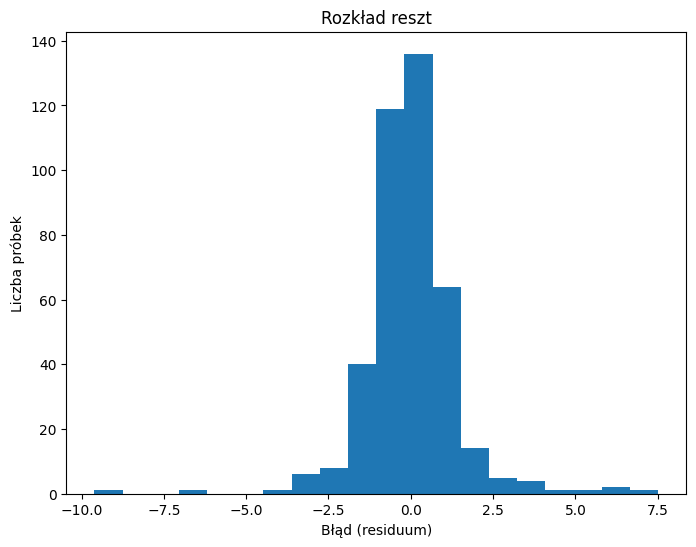

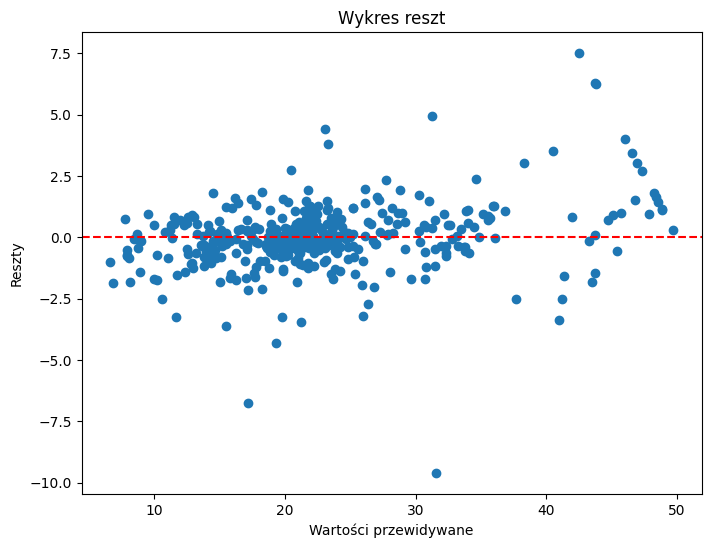

In [16]:
# Obliczenie reszt
residuals = y_train - best_rf.predict(X_train_scaled)

# Histogram reszt
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20)
plt.xlabel('Błąd (residuum)')
plt.ylabel('Liczba próbek')
plt.title('Rozkład reszt')
plt.show()

# Wykres reszt vs. wartości przewidywane
plt.figure(figsize=(8, 6))
plt.scatter(best_rf.predict(X_train_scaled), residuals)
plt.xlabel('Wartości przewidywane')
plt.ylabel('Reszty')
plt.title('Wykres reszt')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

1. Histogram reszt (Rozkład reszt)
Histogram przedstawia rozkład reszt (błędów) modelu regresyjnego.
W idealnym przypadku powinien on przypominać rozkład normalny (kształt dzwonu) i być symetryczny wokół zera.
W tym przypadku większość reszt jest skupiona wokół 0, co sugeruje, że model generalnie dobrze przewiduje wartości.
Istnieje niewielka liczba skrajnych wartości (długie ogony po lewej i prawej stronie), co może sugerować istnienie wartości odstających.
2. Wykres reszt (Reszty vs. Wartości przewidywane)
Ten wykres pokazuje zależność między wartościami przewidywanymi, a błędami modelu (resztami).
W idealnym modelu regresji reszty powinny być losowo rozproszone wokół poziomu 0 (czerwona przerywana linia).
W tym przypadku widoczna jest pewna struktura – reszty są dość dobrze rozproszone, ale widać niewielkie wzorce (np. większa wariancja dla większych wartości przewidywanych).
Jeżeli pojawiłby się wyraźny wzór (np. zakrzywienie), mogłoby to wskazywać na problem z założeniami liniowej regresji (np. brak liniowości w danych).

## 20. Ocena modelu na zbiorze testowym

**Cel:** Sprawdzić, jak model radzi sobie z nowymi danymi.


- **Generalizacja:** Wynik na zbiorze testowym świadczy o przydatności modelu w praktyce.

[Dokumentacja: Regression Metrics](https://scikit-learn.org/stable/modules/model_evaluation.html)

In [17]:
y_test_pred = best_rf.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print('MSE (test):', mse_test)
print('R² (test):', r2_test)

MSE (test): 7.912745333333333
R² (test): 0.8920995891343227


# Zadania do rozwiązania:

1. **Analiza eksploracyjna:**
   - Użyj wykresów `boxplot`, `scatter plot` oraz `pairplot` do zbadania zależności między cechami a ceną.
   - [Seaborn Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) | [Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

2. **Feature Engineering:**
   - Dodaj nowe cechy, np. stosunek liczby pokoi do wieku budynku, i sprawdź ich wpływ na model.
   - [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html)


3. **Strojenie modelu:**
   - Przeprowadź eksperymenty z GridSearchCV oraz RandomizedSearchCV dla różnych modeli i porównaj wyniki.
   - [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) | [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

4. **Porównanie modeli:**
   - Porównaj regresję liniową z modelami ensemble (RandomForest, GradientBoosting) na tym samym zbiorze danych.
   - [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) | [GradientBoostingRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html)
5. Wykonaj podobną analize przy użyciu zbioru California Housung: https://www.kaggle.com/datasets/camnugent/california-housing-prices

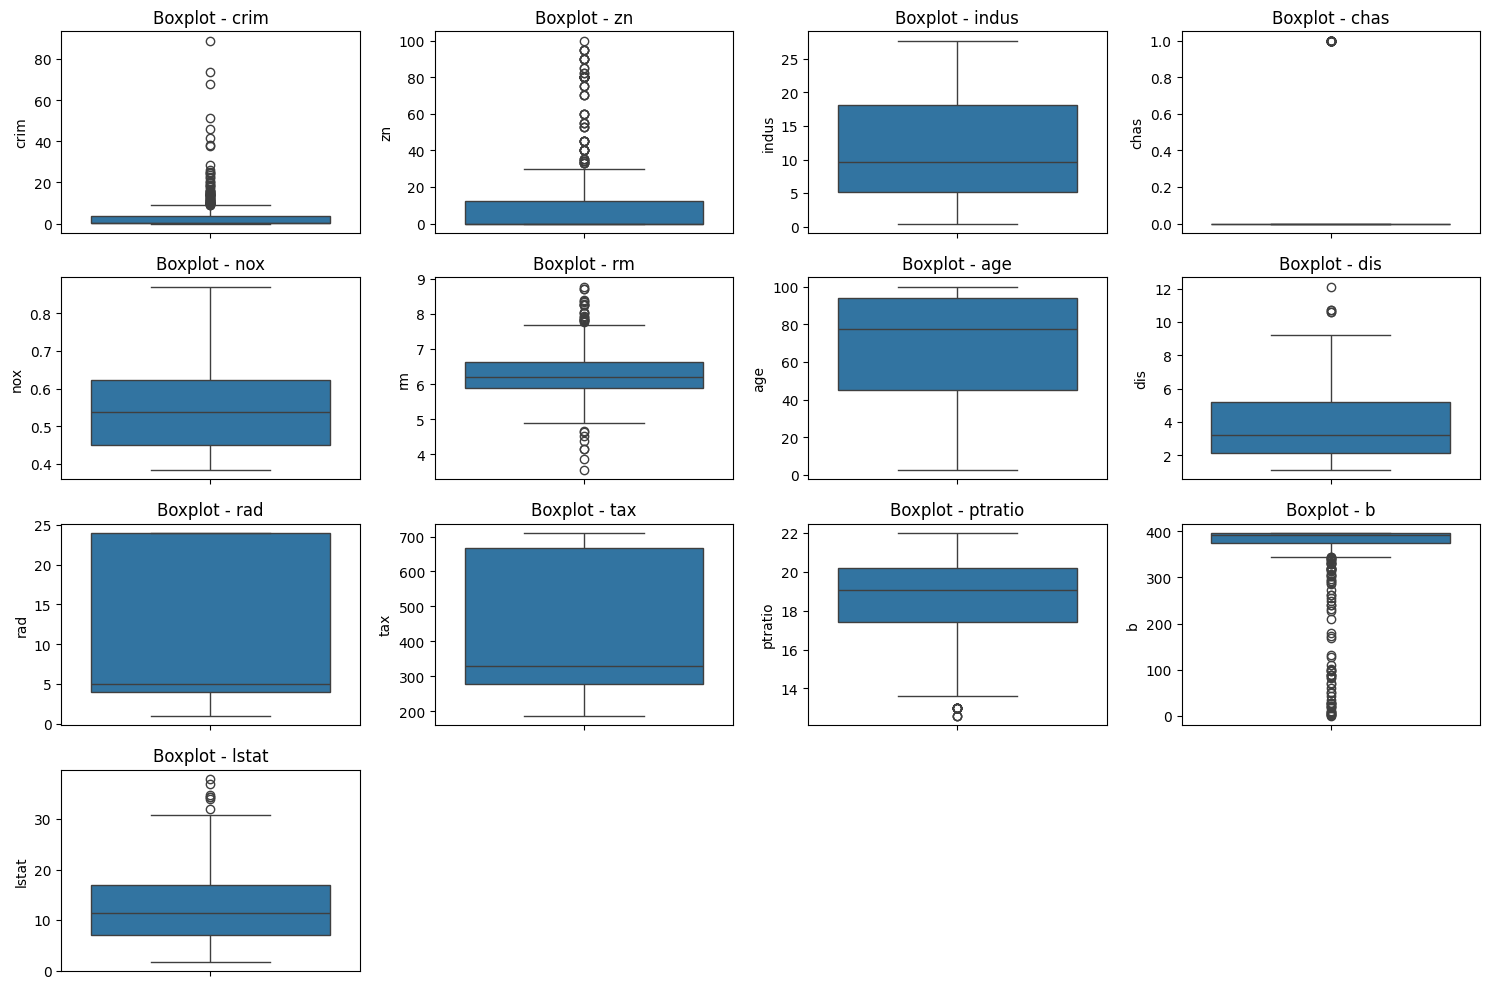

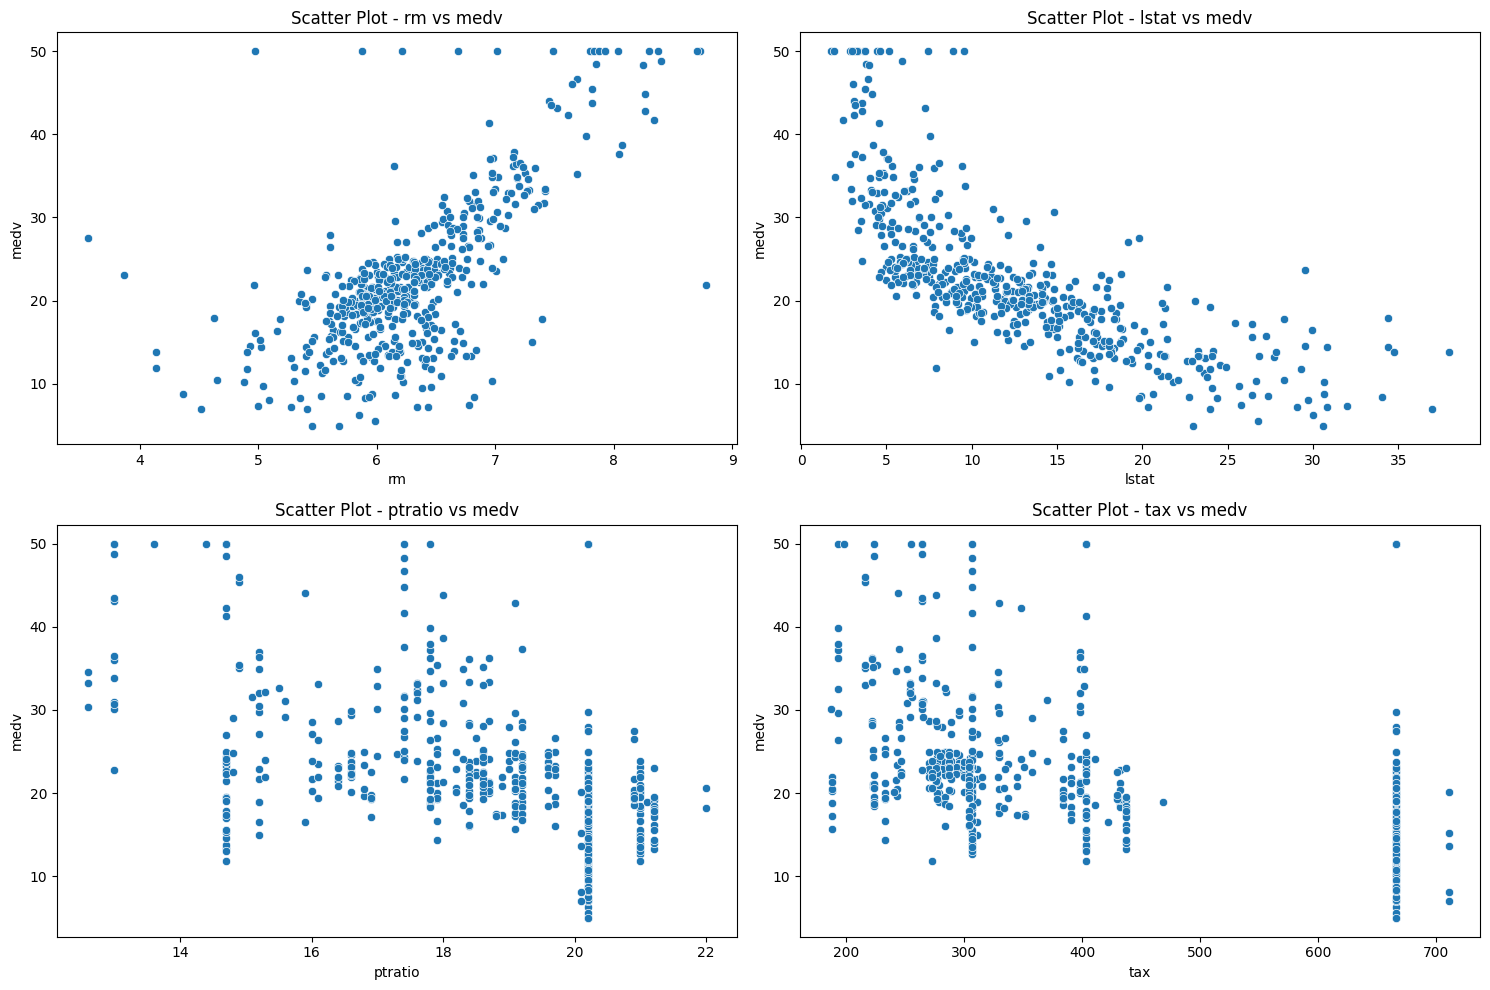

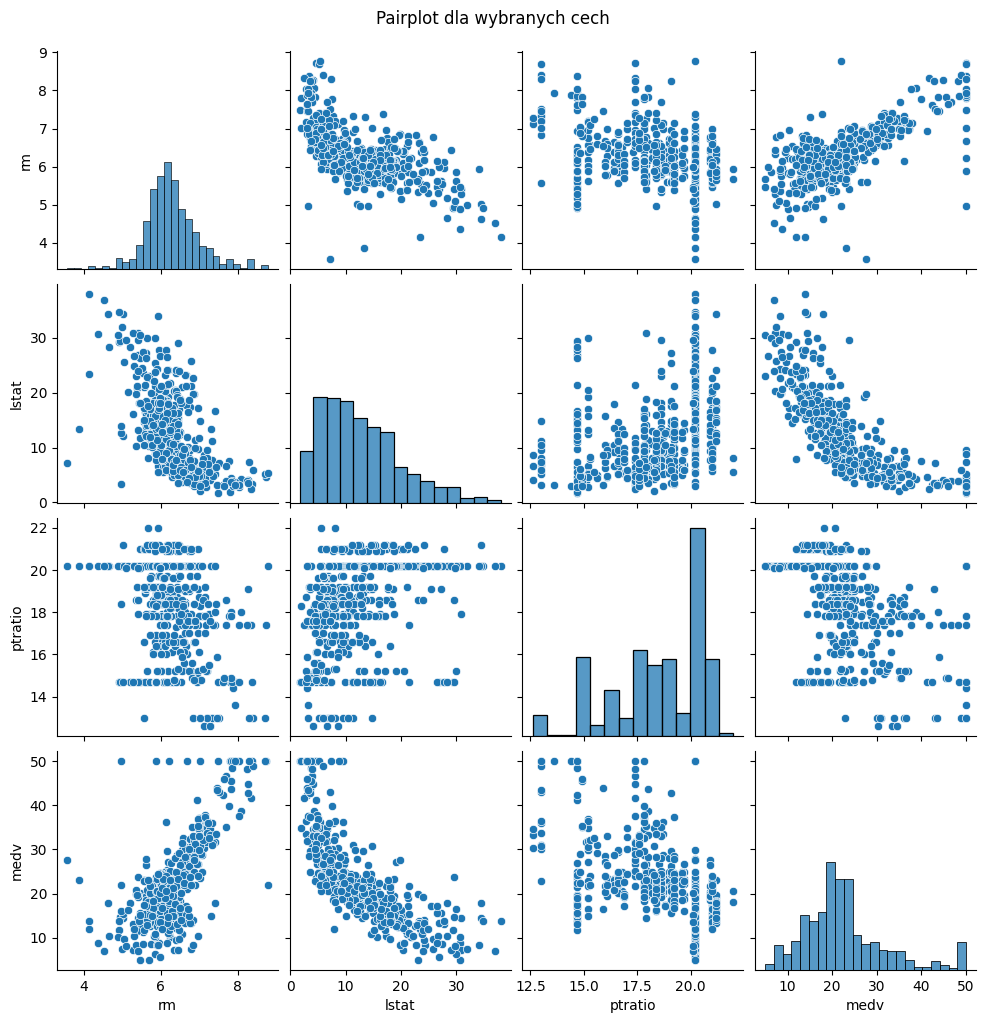

In [20]:
#zadanie1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('BostonHousing.csv')

plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data[column], orient='v')
    plt.title(f'Boxplot - {column}')
plt.tight_layout()
plt.show()

selected_features = ['rm', 'lstat', 'ptratio', 'tax']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=data[feature], y=data['medv'])
    plt.title(f'Scatter Plot - {feature} vs medv')
plt.tight_layout()
plt.show()

sns.pairplot(data[['rm', 'lstat', 'ptratio', 'medv']])
plt.suptitle('Pairplot dla wybranych cech', y=1.02)
plt.show()



In [34]:
#zadanie2

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

data = pd.read_csv('BostonHousing.csv')

data['rm_age_ratio'] = data['rm'] / (data['age'] + 1)          # Stosunek liczby pokoi do wieku budynku
data['crime_dis_ratio'] = data['crim'] / (data['dis'] + 1)      # Stosunek przestępczości do odległości od centrum

X = data.drop('medv', axis=1)
y = data['medv']

selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)

scores = selector.scores_
features = X.columns

print("Wpływ cech na model według SelectKBest:")
for feature, score in zip(features, scores):
    print(f"{feature}: {score:.2f}")

sorted_features = sorted(zip(features, scores), key=lambda x: x[1], reverse=True)

print("\nCechy posortowane według wpływu na model:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.2f}")



Wpływ cech na model według SelectKBest:
crim: 89.49
zn: 75.26
indus: 153.95
chas: 15.97
nox: 112.59
rm: 471.85
age: 83.48
dis: 33.58
rad: 85.91
tax: 141.76
ptratio: 175.11
b: 63.05
lstat: 601.62
rm_age_ratio: 40.30
crime_dis_ratio: 78.83

Cechy posortowane według wpływu na model:
lstat: 601.62
rm: 471.85
ptratio: 175.11
indus: 153.95
tax: 141.76
nox: 112.59
crim: 89.49
rad: 85.91
age: 83.48
crime_dis_ratio: 78.83
zn: 75.26
b: 63.05
rm_age_ratio: 40.30
dis: 33.58
chas: 15.97


In [30]:
#zadanie3

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


data = pd.read_csv('BostonHousing.csv')

data['rm_age_ratio'] = data['rm'] / (data['age'] + 1)
data['crime_dis_ratio'] = data['crim'] / (data['dis'] + 1)

X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

param_dist_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

random_search_rf = RandomizedSearchCV(rf, param_distributions=param_dist_rf, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train, y_train)

print("Najlepsze parametry dla RandomForest (GridSearchCV):", grid_search_rf.best_params_)
print("Najlepsze parametry dla RandomForest (RandomizedSearchCV):", random_search_rf.best_params_)

lr = LinearRegression()
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

grid_search_lr = GridSearchCV(lr, param_grid=param_grid_lr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print("\nNajlepsze parametry dla LinearRegression (GridSearchCV):", grid_search_lr.best_params_)

print("\nPorównanie wyników:")
print(f"R² dla RandomForest (GridSearchCV): {r2_score(y_test, grid_search_rf.predict(X_test)):.4f}")
print(f"R² dla RandomForest (RandomizedSearchCV): {r2_score(y_test, random_search_rf.predict(X_test)):.4f}")
print(f"R² dla LinearRegression (GridSearchCV): {r2_score(y_test, grid_search_lr.predict(X_test)):.4f}")



Najlepsze parametry dla RandomForest (GridSearchCV): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Najlepsze parametry dla RandomForest (RandomizedSearchCV): {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': None}

Najlepsze parametry dla LinearRegression (GridSearchCV): {'fit_intercept': True, 'positive': False}

Porównanie wyników:
R² dla RandomForest (GridSearchCV): 0.8911
R² dla RandomForest (RandomizedSearchCV): 0.8895
R² dla LinearRegression (GridSearchCV): 0.6788


In [29]:
#zadanie 4

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('BostonHousing.csv')

data['rm_age_ratio'] = data['rm'] / (data['age'] + 1)
data['crime_dis_ratio'] = data['crim'] / (data['dis'] + 1)

X = data.drop('medv', axis=1)
y = data['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split=2, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "R²": r2}

print("Porównanie modeli:")
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']:.4f}, R²: {metrics['R²']:.4f}")


Porównanie modeli:
Linear Regression - MSE: 23.5531, R²: 0.6788
Random Forest - MSE: 7.9855, R²: 0.8911
Gradient Boosting - MSE: 6.0526, R²: 0.9175
